<div align=”center”>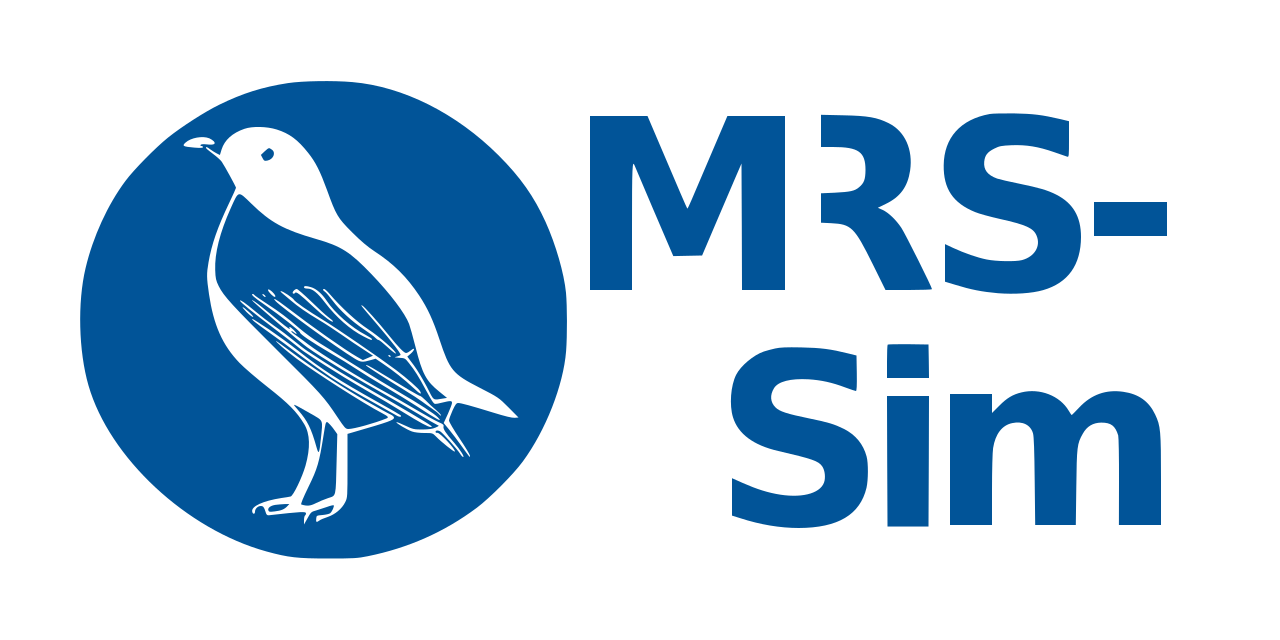</div>

# MRS-Sim Framework
MRS-Sim is an open-source framework for simulating synthetic, in vivo-like MR spectra. While it was originally developed to facilitate deep learning research, it has many other use cases in spectroscopy. 


## Model Overview
The physics model in this simulator considers every aspect of signal formation and acquistion. This was implemented in a modular way so that not only can highly tailored datasets be simulated for a variety of clinical scenarios, but future developments can be easily implemented. The core model can be described by the following equation:


## Tutorial
This notebook will walk you through simulating a dataset. If you have any questions, please feel free to post them in the discussion section of the GitHub repository. If you would like to collaborate to develop a dataset instead of simulating your own, you can reach out at john.lamaster (at) tum (dot) de.

The actual simulations can be conducted using a single command in the terminal or with several cells at the end of this notebook. The simulations themselves are rather easy to run. The challenging part for the users is to define the config.json file and then set how they want the parameters to be sampled, both of which will be elaborated in the following steps. 

### Step 1: Define your config.json file
In this step, you will define the parameters of the simulation. You can see examples in the /src/config/templates folder. The contents of the config file are broken down into sections that are separated by a blank line so it is easier to read. 

The first block of entries defines the fundamentals of the clinical scnenario. 

In [ ]:
"totalEntries": 100,
"PM_basis_set": "PRESS_30_GE_2000.mat",
"NIfTIMRS": true,
"metabolites": ["Asc", "Asp", "Ch", "Cr", "GABA", "Gln", "Glu", "GPC", "GSH", "Lac", "mI", "NAA", "NAAG", "PCh", "PCr", "PE", "sI", "Tau", "MM09", "MM12", "MM14", "MM17", "MM20", "Lip09", "Lip13", "Lip20"], 
"wrt_metab": "Cr,PCr",
"wrt_metab_ratio": [0.525,0.475],
"snr_metab": "Cr,PCr",
"B0": 3.0, 
"TE": 30,
"vendor": "GE",
"cropRange": [0.2,4.2],
"use_covmat": false, 
"spectralwidth": 2000,
"spectrum_length": 1024, 
"basis_fcn_length": 2048,
"image_resolution":    [ 0.5,  0.5,  0.5],
"spectral_resolution": [10.0, 10.0, 10.0],
"notes": "Here you can leave extra notes relevant to the simulation or experiments.",

The second block activates different spectral components and artifacts in the model. Here you will use boolean flags to turn artifacts on and off. A few will require numerical values such as _num\_coils_, _drop\_prob_, _snr_, and _ppm\_ref_. Respectively, these define: the number of coil transients to simulate with 1 being coil combined data; the rate of randomly excluding different parts of the model; a list of the SNR min and max ranges; and the reference ppm value, generally the water peak which is 4.65 at 37°C.

In [ ]:
"apodize": false,
"broadening": true,
"lineshape": "voigt",
"b0": true,
"eddy": true,
"fids": false,
"fshift_g": true,
"fshift_i": true,
"phi0": true,
"phi1": true,
"magnitude": false,
"noise": true,
"mm_lip": false,
"num_coils": 1,
"coil_fshift": false,
"coil_phi0": false,
"coil_sens": false,
"snr_combo": "both",
"residual_water": true,
"zero_fill": false,
"resample": false,
"drop_prob": 0.0,
"ppm_ref": 4.65,
"covmat": {"matrix": null,
           "loc":    null},

The third block is where you define the minimum and maximum parameter ranges. If you leave anything out of this section, default values will be used.

In [ ]:
"parameters": {
    "_d":              [     3,    10],
    "_g":              [     5,    20],
    "_dmm":            [    10,   100],
    "_gmm":            [     5,    20],
    "f_shift":         [   -10,    10],
    "phi0":            [  -0.1,   0.1], 
    "phi1":            [ -0.05,  0.05], 
    "b0_dir":          [    -5,    15],
    "ppm_ref":                    4.65, 
    "snr_min":         [    10,    30], 
    "b0":              [   150,   200], 
    "coil_sens":       [     0,     2],
    "coil_fshift":     [   -20,    20],
    "coil_phi0":       [   -15,    15],
    "eddyCurrents_A":  [   1.0,  10.0],
    "eddyCurrents_tc": [  0.02,   0.3],
    "asc":             [   0.0,  0.16],
    "asp":             [   0.0,  0.16],
    "ch":              [   0.0,  0.20],
    "gaba":            [   0.0,  0.90],
    "glc":             [   0.0,  0.23],
    "gln":             [   0.0,  0.42],
    "glu":             [   0.0,  3.00],
    "gly":             [   0.0,  0.50],
    "gpc":             [   0.0,  0.44],
    "gsh":             [   0.0,  0.18],
    "lac":             [   0.0,  0.04],
    "mi":              [   0.0,  0.90],
    "naa":             [   0.0,  3.50],
    "naag":            [   0.0,  0.65],
    "pch":             [   0.0,  0.22],  
    "pcr":             [   0.3,   1.0],
    "pe":              [   0.0,  0.40],
    "si":              [   0.0,  0.80],
    "tau":             [   0.0,  0.22],
    "mm09":            [   0.0,  15.0],
    "mm12":            [   0.0,  15.0],
    "mm14":            [   0.0,  15.0],
    "mm17":            [   0.0,  15.0],
    "mm20":            [   0.0,  15.0],
    "lip09":           [   0.0,  15.0],
    "lip13":           [   0.0,  15.0],
    "lip20":           [   0.0,  15.0]
},

The fourth and fifth blocks are used for defining the baseline offset and the residual water contribution. In general, you should not need to modify these dictionaries. Another notebook will be included in this repo that explores the effects of the parameters for these offset simulations.

In [ ]:
"baseline_cfg": {
    "start":           [            0],
    "end":             [            0],
    "upper":           [            1],
    "lower":           [           -1],
    "std":             [  0.05,  0.20],
    "window":          [  0.15,   0.3],
    "pt_density":          128,
    "cropRange":       [  -1.6,   8.5],
    "scale":           [     1,   1.0],
    "drop_prob":           0.0
},
    
"resWater_cfg": {
    "upper":           [     0,     1],
    "lower":           [     0,     1],
    "std":             [   0.2,  0.40],
    "window":          [         0.01],
    "pt_density":         1204,
    "cropRange_water": [   4.4,   4.9],
    "cropRange":       [     0,     5],
    "prime":              0.15,
    "scale":           [  0.05,  0.20],
    "drop_prob":           0.0
}

### Step 2: Define the parameter sampling scheme
This section of code is used to define the sampling distributions for the parameters.The only code that should be modified will be inside this _sample()_ function. The template files have been documented explaining what types of changes need to go where. Below is an example that is also well-documented.

In [ ]:
def sample(inputs):
    # Do NOT change the following line!
    config, resWater_cfg, baseline_cfg, pm, l, ind, p, totalEntries = inputs

    # Sample parameters from a uniform distribution - deep learning application
    params = torch.ones((totalEntries, ind['overall'][-1]+1)).uniform_(0,1)
    
    # normalization converts the range from [0,1) to [0,1].
    params = normalize(params, dims=-1) 
    
    # Quantify parameters
    params = pm.quantify_params(params)
    
    '''
    This next section of code will need to be customized for your own implementations.
    '''

    # All metabolite values are ratios wrt some other metabolite or group of metabolites.
    # Therefore, the reference metab or pair/group will always sum to 1.0
    if len(config.wrt_metab.split(','))==1: wrt_metab_ratio = [1]
    for m, v in zip(config.wrt_metab.split(','),wrt_metab_ratio):
        assert(m in config.metabolites)
        params[:,ind[m.lower()]].fill_(v)
    
    '''
    The next section of code is used to drop some parameters from each spectrum for deep learning applications.
    Should you want to use different distributions for some of the parameters, the following can be used as a 
    guide. Defining different distributions can be done before OR after quantifying the parameters.
    '''
    print('>>> Line Broadening')
    keys, g = ind.keys(), 0
    for k in keys: g += 1 if 'mm' in k else 0
    for k in keys: g += 1 if 'lip' in k else 0

    # Drop Lorentzian (D) from some metabolites
    if config.lineshape in ['voigt','lorentzian']:
        for n in ind['d']:
            sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
            params[sign,n].fill_(0.)
    else:
        for n in ind['d']: params[:,n].fill_(0.0)
        
    # One Gaussian value is used for metabolites and the other is used for MM/Lip - but only 2 values!
    # Should an additional group be separated, this and the pm.initialize() code will need to be updated.
    if config.lineshape in ['voigt','gaussian']:
        for n in ind['g']:
            if n==0 || n==int(l-g-1):
                sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
                params[sign,n].fill_(0.)

            if n>0 and n<l-g-1:
                params[:,n] = params[:,ind['g'][0]].clone()
            if n>l-g-1:
                params[:,n] = params[:,ind['g'][int(l-g-1)]].clone()
    else:
        for n in ind['g']: 
            params[:,n].fill_(0.0)
            
    
    print('>>> Transients')
    factors = torch.distributions.normal.Normal(1,0.25).sample(params[:,ind['coil_snr']].shape)
    params[:,ind['coil_snr']] = factors
    # Values are sampled from a Gaussian mu=1, min/max=0/2
    # The linear SNR is calculated and scaled based on the number of transients
    # Then the linear SNR is scaled about 1.0 so mu = lin_snr
    if config.coil_sens:
        print('>>> Coil Sensitivities')
        params[:,ind['coil_sens']] = torch.distributions.normal.Normal(1,0.5).sample(params[:,ind['coil_sens']].shape).clamp(min=0.0,max=2.0)
        sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
        params[sign,ind['coil_sens']].fill_(1.0)

    if config.coil_fshift:
        print('>>> Coil Frequency Drift')
        factors = torch.distributions.normal.Normal(1,0.25).sample(params[:,ind['coil_fshift']].shape)
        params[:,ind['coil_fshift']] = factors * params[:,ind['coil_fshift']][0]
        sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
        params[sign,ind['coil_fshift']].fill_(0.0)

    if config.coil_phi0:
        print('>>> Coil Phase Drift')
        factors = torch.distributions.normal.Normal(1,0.25).sample(params[:,ind['coil_phi0']].shape)
        params[:,ind['coil_phi0']] = factors * params[:,ind['coil_phi0']][0]
        sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
        params[sign,ind['coil_phi0']].fill_(0.0)

    '''
    If certain parts of the model are turned off, then their values should be zeroed out.
    '''
    if not config.b0:
        params[:,ind['b0']].fill_(0.0)
        for n in ind['b0_dir']: params[:,n].fill_(0.0)
    # D is dealt with above
    if not config.eddy: 
        for n in ind['ecc']: params[:,n].fill_(0.0)
    if not config.fshift_g: params[:,ind['f_shift']].fill_(0.0)
    if not config.fshift_i:
        for n in ind['f_shifts']: params[:,n].fill_(0.0)
    # G is dealt with above
    if not config.noise: params[:,ind['snr']].fill_(0.0)
    if not config.phi0: params[:,ind['phi0']].fill_(0.0)
    if not config.phi1: params[:,ind['phi1']].fill_(0.0)
    if config.num_coils<=1:
        params[:,ind['coil_snr']].fill_(0.0)
        params[:,ind['coil_sens']].fill_(0.0)
        params[:,ind['coil_fshift']].fill_(0.0)
        params[:,ind['coil_phi0']].fill_(0.0)
    
    
    return config, resWater_cfg, baseline_cfg, pm, l, ind, p, totalEntries, params

The _sample()_ function defined above should be included in the _custom\_dataset.py_ file that is used to run the simulation. The template for such a file is below. The _sample()_ function should be included after the imports and before ```if __name__=='__main__':```. Save this file in the main folder of this repository.

In [ ]:
import argparse
import json
import os
import sys

import numpy as np
import scipy.io as io
import torch
from types import SimpleNamespace

from src.aux import normalize
from src.main_fcns import _save, prepare, simulate


sys.path.append('../')


# Define sample function
# The sample function described above should be copied and pasted here.
# def sample(input):
#     ...


if __name__=='__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--savedir', type=str, default='./dataset/30ms_publication')
    parser.add_argument('--batchSize', type=int, default=10000)
    parser.add_argument('--stepSize', type=int, default=10000)
    parser.add_argument('--parameters', type=str, default=None, help='Path to .mat file with pre-sampled parameters')
    parser.add_argument('--config_file', type=str, default='./src/configurations/debug_new_init.json')

    args = parser.parse_args()

    os.makedirs(args.savedir, exist_ok=True)

    # Simulate
    if isinstance(args.parameters, str):
        from aux import load_parameters
        sampled = load_parameters(args.parameters, prepare(args.config_file))
    else:
        sampled = sample(prepare(args.config_file))

    path = simulate(sampled,args=args)

    io.savemat(path+'_sampled_parameters.mat', mdict={'params': sampled[-1]})

### Step 3: Running the simulations
Once the config.json file and the custom\_dataset.py have been developed, it is time to run the simulation. There are two main options for running the simulation: command line and jupyter-notebook. 


#### Command Line
The _savedir_ and _config\_file_ arguments can be save in the file above or given in the command line. If they are saved in the file, the following command can be used: 

```> python3 custom_dataset.py```

If they are not saved in the file itself, the following command can be use:

```> python3 custom_dataset.py --savedir "./dataset/custom_dataset" --config_file "./src/config/config.json"```

#### Jupyter-Notebook
If you prefer to use a Juypter-Notebook, you can update the code below as described above and then click _Run_ in each of the following cells in the order in which they appear.

In [ ]:
import argparse
import json
import os
import sys

import numpy as np
import scipy.io as io
import torch
from types import SimpleNamespace

from src.aux import normalize
from src.main_fcns import _save, prepare, simulate


sys.path.append('../')

In [ ]:
config = {
    "totalEntries": 100,
    "PM_basis_set": "PRESS_30_GE_2000.mat",
    "NIfTIMRS": true,
    "metabolites": ["Asc", "Asp", "Ch", "Cr", "GABA", "Gln", "Glu", "GPC", "GSH", "Lac", "mI", "NAA", "NAAG", "PCh", "PCr", "PE", "sI", "Tau", "MM09", "MM12", "MM14", "MM17", "MM20", "Lip09", "Lip13", "Lip20"], 
    "wrt_metab": "Cr,PCr",
    "wrt_metab_ratio": [0.525,0.475],
    "snr_metab": "Cr,PCr",
    "B0": 3.0, 
    "TE": 30,
    "vendor": "GE",
    "cropRange": [0.2,4.2],
    "use_covmat": false, 
    "spectralwidth": 2000,
    "spectrum_length": 1024, 
    "basis_fcn_length": 2048,
    "image_resolution":    [ 0.5,  0.5,  0.5],
    "spectral_resolution": [10.0, 10.0, 10.0],
    "notes": "Here you can leave extra notes relevant to the simulation or experiments.",
    
    "apodize": false,
    "broadening": true,
    "lineshape": "voigt",
    "b0": true,
    "eddy": true,
    "fids": false,
    "fshift_g": true,
    "fshift_i": true,
    "phi0": true,
    "phi1": true,
    "magnitude": false,
    "noise": true,
    "mm_lip": false,
    "num_coils": 1,
    "coil_fshift": false,
    "coil_phi0": false,
    "coil_sens": false,
    "snr_combo": "both",
    "residual_water": true,
    "zero_fill": false,
    "resample": false,
    "drop_prob": 0.0,
    "snr": [10, 30], 
    "ppm_ref": 4.65,
    "covmat": {"matrix": null,
           "loc":    null},
    
    "parameters": {
        "_d":              [     3,    10],
        "_g":              [     5,    20],
        "_dmm":            [    10,   100],
        "_gmm":            [     5,    20],
        "f_shift":         [   -10,    10],
        "phi0":            [  -0.1,   0.1], 
        "phi1":            [ -0.05,  0.05], 
        "b0_dir":          [    -5,    15],
        "ppm_ref":                    4.65, 
        "snr_min":         [    10,    30], 
        "b0":              [   150,   200], 
        "coil_sens":       [     0,     2],
        "coil_fshift":     [   -20,    20],
        "coil_phi0":       [   -15,    15],
        "eddyCurrents_A":  [   1.0,  10.0],
        "eddyCurrents_tc": [  0.02,   0.3],
        "asc":             [   0.0,  0.16],
        "asp":             [   0.0,  0.16],
        "ch":              [   0.0,  0.20],
        "gaba":            [   0.0,  0.90],
        "glc":             [   0.0,  0.23],
        "gln":             [   0.0,  0.42],
        "glu":             [   0.0,  3.00],
        "gly":             [   0.0,  0.50],
        "gpc":             [   0.0,  0.44],
        "gsh":             [   0.0,  0.18],
        "lac":             [   0.0,  0.04],
        "mi":              [   0.0,  0.90],
        "naa":             [   0.0,  3.50],
        "naag":            [   0.0,  0.65],
        "pch":             [   0.0,  0.22],  
        "pcr":             [   0.3,   1.0],
        "pe":              [   0.0,  0.40],
        "si":              [   0.0,  0.80],
        "tau":             [   0.0,  0.22],
        "mm09":            [   0.0,  15.0],
        "mm12":            [   0.0,  15.0],
        "mm14":            [   0.0,  15.0],
        "mm17":            [   0.0,  15.0],
        "mm20":            [   0.0,  15.0],
        "lip09":           [   0.0,  15.0],
        "lip13":           [   0.0,  15.0],
        "lip20":           [   0.0,  15.0]
    },
    
    "baseline_cfg": {
        "start":           [            0],
        "end":             [            0],
        "upper":           [            1],
        "lower":           [           -1],
        "std":             [  0.05,  0.20],
        "window":          [  0.15,   0.3],
        "pt_density":          128,
        "cropRange":       [  -1.6,   8.5],
        "scale":           [     1,   1.0],
        "drop_prob":           0.0
    },

    "resWater_cfg": {
        "upper":           [     0,     1],
        "lower":           [     0,     1],
        "std":             [   0.2,  0.40],
        "window":          [         0.01],
        "pt_density":         1204,
        "cropRange_water": [   4.4,   4.9],
        "cropRange":       [     0,     5],
        "prime":              0.15,
        "scale":           [  0.05,  0.20],
        "drop_prob":           0.0
    }    
}

In [ ]:
def sample(inputs):
    # Do NOT change the following line!
    config, resWater_cfg, baseline_cfg, pm, l, ind, p, totalEntries = inputs

    # Sample parameters from a uniform distribution - deep learning application
    params = torch.ones((totalEntries, ind['overall'][-1]+1)).uniform_(0,1)
    
    # normalization converts the range from [0,1) to [0,1].
    params = normalize(params, dims=-1) 
    
    # Quantify parameters
    params = pm.quantify_params(params)
    
    '''
    This next section of code will need to be customized for your own implementations.
    '''

    # All metabolite values are ratios wrt some other metabolite or group of metabolites.
    # Therefore, the reference metab or pair/group will always sum to 1.0
    if len(config.wrt_metab.split(','))==1: wrt_metab_ratio = [1]
    for m, v in zip(config.wrt_metab.split(','),wrt_metab_ratio):
        assert(m in config.metabolites)
        params[:,ind[m.lower()]].fill_(v)
    
    '''
    The next section of code is used to drop some parameters from each spectrum for deep learning applications.
    Should you want to use different distributions for some of the parameters, the following can be used as a 
    guide. Defining different distributions can be done before OR after quantifying the parameters.
    '''
    print('>>> Line Broadening')
    keys, g = ind.keys(), 0
    for k in keys: g += 1 if 'mm' in k else 0
    for k in keys: g += 1 if 'lip' in k else 0

    # Drop Lorentzian (D) from some metabolites
    if config.lineshape in ['voigt','lorentzian']:
        for n in ind['d']:
            sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
            params[sign,n].fill_(0.)
    else:
        for n in ind['d']: params[:,n].fill_(0.0)
        
    # One Gaussian value is used for metabolites and the other is used for MM/Lip - but only 2 values!
    # Should an additional group be separated, this and the pm.initialize() code will need to be updated.
    if config.lineshape in ['voigt','gaussian']:
        for n in ind['g']:
            if n==0 || n==int(l-g-1):
                sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
                params[sign,n].fill_(0.)

            if n>0 and n<l-g-1:
                params[:,n] = params[:,ind['g'][0]].clone()
            if n>l-g-1:
                params[:,n] = params[:,ind['g'][int(l-g-1)]].clone()
    else:
        for n in ind['g']: 
            params[:,n].fill_(0.0)
            
    
    print('>>> Transients')
    factors = torch.distributions.normal.Normal(1,0.25).sample(params[:,ind['coil_snr']].shape)
    params[:,ind['coil_snr']] = factors
    # Values are sampled from a Gaussian mu=1, min/max=0/2
    # The linear SNR is calculated and scaled based on the number of transients
    # Then the linear SNR is scaled about 1.0 so mu = lin_snr
    if config.coil_sens:
        print('>>> Coil Sensitivities')
        params[:,ind['coil_sens']] = torch.distributions.normal.Normal(1,0.5).sample(params[:,ind['coil_sens']].shape).clamp(min=0.0,max=2.0)
        sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
        params[sign,ind['coil_sens']].fill_(1.0)

    if config.coil_fshift:
        print('>>> Coil Frequency Drift')
        factors = torch.distributions.normal.Normal(1,0.25).sample(params[:,ind['coil_fshift']].shape)
        params[:,ind['coil_fshift']] = factors * params[:,ind['coil_fshift']][0]
        sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
        params[sign,ind['coil_fshift']].fill_(0.0)

    if config.coil_phi0:
        print('>>> Coil Phase Drift')
        factors = torch.distributions.normal.Normal(1,0.25).sample(params[:,ind['coil_phi0']].shape)
        params[:,ind['coil_phi0']] = factors * params[:,ind['coil_phi0']][0]
        sign = torch.tensor([True if torch.rand([1]) > p else False for _ in range(params.shape[0])])
        params[sign,ind['coil_phi0']].fill_(0.0)

    '''
    If certain parts of the model are turned off, then their values should be zeroed out.
    '''
    if not config.b0:
        params[:,ind['b0']].fill_(0.0)
        for n in ind['b0_dir']: params[:,n].fill_(0.0)
    # D is dealt with above
    if not config.eddy: 
        for n in ind['ecc']: params[:,n].fill_(0.0)
    if not config.fshift_g: params[:,ind['f_shift']].fill_(0.0)
    if not config.fshift_i:
        for n in ind['f_shifts']: params[:,n].fill_(0.0)
    # G is dealt with above
    if not config.noise: params[:,ind['snr']].fill_(0.0)
    if not config.phi0: params[:,ind['phi0']].fill_(0.0)
    if not config.phi1: params[:,ind['phi1']].fill_(0.0)
    if config.num_coils<=1:
        params[:,ind['coil_snr']].fill_(0.0)
        params[:,ind['coil_sens']].fill_(0.0)
        params[:,ind['coil_fshift']].fill_(0.0)
        params[:,ind['coil_phi0']].fill_(0.0)
    
    
    return config, resWater_cfg, baseline_cfg, pm, l, ind, p, totalEntries, params

In [ ]:
# Change the default values to your specified inputs. If you have no changes for a particular argument, 
# then leave it as it is.
parser = argparse.ArgumentParser()
parser.add_argument('--savedir', type=str, default='./dataset/30ms_publication')
parser.add_argument('--batchSize', type=int, default=10000)
parser.add_argument('--stepSize', type=int, default=10000)
parser.add_argument('--parameters', type=str, default=None, help='Path to .mat file with pre-sampled parameters')
parser.add_argument('--config_file', type=str, default='./src/configurations/debug_new_init.json')

# Parse the arguments
args = parser.parse_args()

# Make sure that the save directory exists
os.makedirs(args.savedir, exist_ok=True)

# Save the config dictionary as a json file for future reference
json_config = json.dumps(config, indent=4)
with open(os.path.join(args.savedir,'config.json'), 'w') as file:
    file.write(json_config)

In [ ]:
# Initialize the model and sample the parameters needed for the simulations
if isinstance(args.parameters, str):
    from src.aux import load_parameters
    sampled = load_parameters(args.parameters, prepare(args.config_file))
else:
    sampled = sample(prepare(args.config_file))

# Simulate and export the spectra
path = simulate(sampled,args=args)

# Save the parameters as a .mat file
io.savemat(path+'_sampled_parameters.mat', mdict={'params': sampled[-1]})